# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.



In [1260]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#import pydotplus
#import io
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import discriminant_analysis
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import seaborn.apionly as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Question 1

In [1261]:
#Loading dataset
df = pd.read_csv('cs109a_midterm.csv')

# Creating a new variable according to ARRIVAL_DELAY
df["DELAY_OR_NOT"]=""
df["DELAY_OR_NOT"][df['ARRIVAL_DELAY']>=15]=1
df["DELAY_OR_NOT"][df['ARRIVAL_DELAY']<15]=0

In [1262]:
print(sum(pd.isnull(df['AIR_SYSTEM_DELAY'])))
print(sum(pd.isnull(df['SECURITY_DELAY'])))
print(sum(pd.isnull(df['LATE_AIRCRAFT_DELAY'])))
print(sum(pd.isnull(df['WEATHER_DELAY'])))
print(sum(pd.isnull(df['AIRLINE_DELAY'])))
# Most of the data points in this predictors are NaN

722834
722834
722834
722834
722834


In [1263]:
# From Q2, dropping columns which are not suitable as predictor. Explanation in Q2 below
df=df.drop(['DATE', 'ARRIVAL_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'DAY','TAIL_NUMBER', 'FLIGHT_NUMBER'], axis=1)
df.shape

(804941, 12)

In [1264]:
df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,DELAY_OR_NOT
0,9,6,AA,ORD,LGA,07:15:00,10:30:00,9.0,733,135.0,127.0,0
1,10,3,AA,11298,13342,20:15:00,22:44:00,0.0,853,149.0,118.0,0
2,8,3,MQ,XNA,ORD,12:22:00,14:10:00,-1.0,522,108.0,88.0,0
3,12,2,WN,PHX,BWI,11:20:00,17:40:00,11.0,1999,260.0,235.0,0
4,9,2,WN,MCI,DEN,14:10:00,14:55:00,-4.0,533,105.0,97.0,0


In [1265]:
# CONVERTING CLOCK TIME TO SECONDS INTEGER (TOOK THREE HOURS) for x_train_dummy
z = df['SCHED_DEP'].str.split(pat = ':', expand=True)
x = z.values
x = z.astype(float)
x = pd.DataFrame(x)
x.iloc[:,2:3]=x.iloc[:,2:3]*(1/3600)
x.iloc[:,1:2]=x.iloc[:,1:2]*(1/60)
x['sum']=x.sum(axis=1)
df['SCHED_DEP']=x['sum']

z = df['SCHED_ARR'].str.split(pat = ':', expand=True)
x = z.values
x = z.astype(float)
x = pd.DataFrame(x)
x.iloc[:,2:3]=x.iloc[:,2:3]*(1/3600)
x.iloc[:,1:2]=x.iloc[:,1:2]*(1/60)
x['sum']=x.sum(axis=1)
df['SCHED_ARR']=x['sum']

df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,DELAY_OR_NOT
0,9,6,AA,ORD,LGA,7.250000,10.500000,9.0,733,135.0,127.0,0
1,10,3,AA,11298,13342,20.250000,22.733333,0.0,853,149.0,118.0,0
2,8,3,MQ,XNA,ORD,12.366667,14.166667,-1.0,522,108.0,88.0,0
3,12,2,WN,PHX,BWI,11.333333,17.666667,11.0,1999,260.0,235.0,0
4,9,2,WN,MCI,DEN,14.166667,14.916667,-4.0,533,105.0,97.0,0


In [1266]:
#splitting main dataset into a workable smaller data test and rest of the datatest which will be used for testing
msk = np.random.rand(len(df)) < 0.15
df_small = df[msk]
df_rest = df[~msk]
df_small.shape, df_rest.shape

((120867, 12), (684074, 12))

In [1267]:
df_x = df_small.iloc[:, 0:11]
df_y = df_small.iloc[:, 11:12]
df_x_rest = df_rest.iloc[:, 0:11]
df_y_rest = df_rest.iloc[:, 11:12]
df_x.shape, df_y.shape, df_x_rest.shape, df_y_rest.shape

((120867, 11), (120867, 1), (684074, 11), (684074, 1))

In [1268]:
# creating the smaller train/test set on which we will do the bulk of the modelling work
x_train_small, x_test_small, y_train_small, y_test_small= train_test_split(df_x, df_y, test_size = 0.33)
print("shapes:", x_train_small.shape, y_train_small.shape, x_test_small.shape, y_test_small.shape)

shapes: (80980, 11) (80980, 1) (39887, 11) (39887, 1)


# Question 2

Which variables should not be used?
- Date: this is unique number which will be never be repeated in the future (e.g. there will never be another 2015-06-25 again) thus is not practical. Drop it.
- Arrival_delay: Since this has been used to create the Delay_or_not dependable variable this cannot be a predictor. Drop it.
- Air system delay, Security delay, Late aircraft delay, Weather Delay: All of these variables have about 90% NaN which is too high to impute any missing values. Also these are explicit delays, very likely to cause actual delays in the arrival time thus common sense dictates that incurring any of these delay will most likely result in a delay of arrival. What could have been interesting is to parse how much a delay can be expected if any of these delays take place - however, the proportions of NaNs is too high for imputation. Drop them.
- Day: 30 or 31 days in a month, when made into dummies will become 62 dummies. Besides the specific date of the month is less relevant compared to the day of the week. Most of the variance that will be in the day of the month will be captured by the day of the week predictor.
- Tail number: I am assuming that with the tail number it will be possible to identify the make of plane hence some metrics about its performance, there are far too many unique tail numbers to be a useful predictor. Hence dropped it.

Because I have complicated series of test-train splits I am going back up to quesiton 1 and dropping these from the main df, before I make teh train-test split in order to minimize teh drops.

In [1269]:
x_train_small.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME
740307,2,7,US,CLT,ATL,9.500000,10.783333,-8.0,226,77.0,63.0
791567,1,1,B6,FLL,LAX,11.616667,14.483333,3.0,2342,352.0,333.0
749228,1,5,AA,DCA,MIA,18.083333,20.816667,-1.0,919,164.0,160.0
796915,7,1,AS,SEA,JNU,7.666667,9.116667,9.0,909,147.0,149.0
588745,7,1,DL,ATL,TPA,10.583333,12.000000,-3.0,406,85.0,74.0


# Question 3

In [1270]:
n = df_small['DELAY_OR_NOT'].value_counts()
n = pd.DataFrame(n).values
delay = (n[1:2]/(n[0:1]+n[1:2]))
print(delay)
print("Only 10.1% of the observations is delay = 1 data thus by classifying everything as delayed=0, we would be 90% accurate. Imbalanced data set")

[[ 0.10173993]]
Only 10.1% of the observations is delay = 1 data thus by classifying everything as delayed=0, we would be 90% accurate. Imbalanced data set


In [1271]:
a = df_small.groupby(by=['ORIGIN_AIRPORT'])['DELAY_OR_NOT'].sum()
a = pd.DataFrame(a)
b=df_small["ORIGIN_AIRPORT"].value_counts()
b = pd.DataFrame(b)
c = pd.concat ([a, b], axis=1).reset_index()
c['Average_delays']=c['DELAY_OR_NOT']/c['ORIGIN_AIRPORT']
c.sort_values(['Average_delays'], ascending=False, inplace=True)
c.shape

(605, 4)

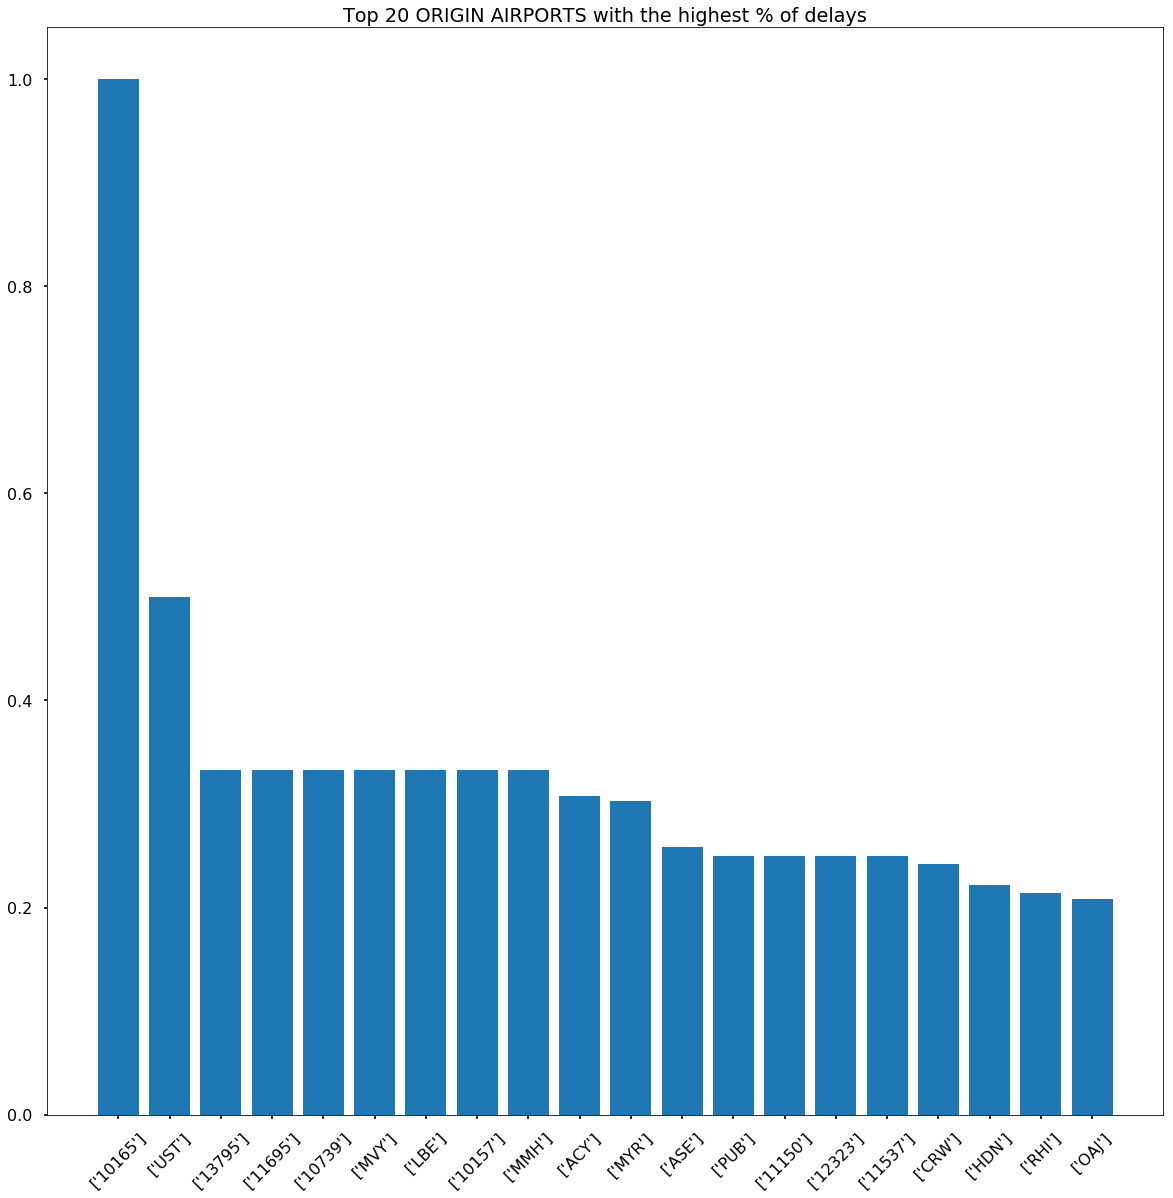

In [1272]:
# BAR CHART FOR TOP TEN AIRPORTS 
plt.figure(figsize=(20, 20))
#f, (ax1, ax2) =plt.subplots(1,2, sharey=True)
airport = list(range(1,21))
labels=c.iloc[:,0:1].values
d=c.iloc[0:20, 3:4].values
plt.xticks(airport, labels, rotation=45)
plt.bar(airport,d )
plt.title ("Top 20 ORIGIN AIRPORTS with the highest % of delays")

In [1273]:
a = df_small.groupby(by=['DESTINATION_AIRPORT'])['DELAY_OR_NOT'].sum()
a = pd.DataFrame(a)
b=df_small["DESTINATION_AIRPORT"].value_counts()
b = pd.DataFrame(b)
c = pd.concat ([a, b], axis=1).reset_index()
c['Average_delays']=c['DELAY_OR_NOT']/c['DESTINATION_AIRPORT']
c.sort_values(['Average_delays'], ascending=False, inplace=True)
c.shape
c.head()

,index,DELAY_OR_NOT,DESTINATION_AIRPORT,Average_delays
439,ITH,1,1,1.000000
512,PBG,4,4,1.000000
8,10170,1,1,1.000000
89,11617,1,1,1.000000
526,PSE,6,9,0.666667


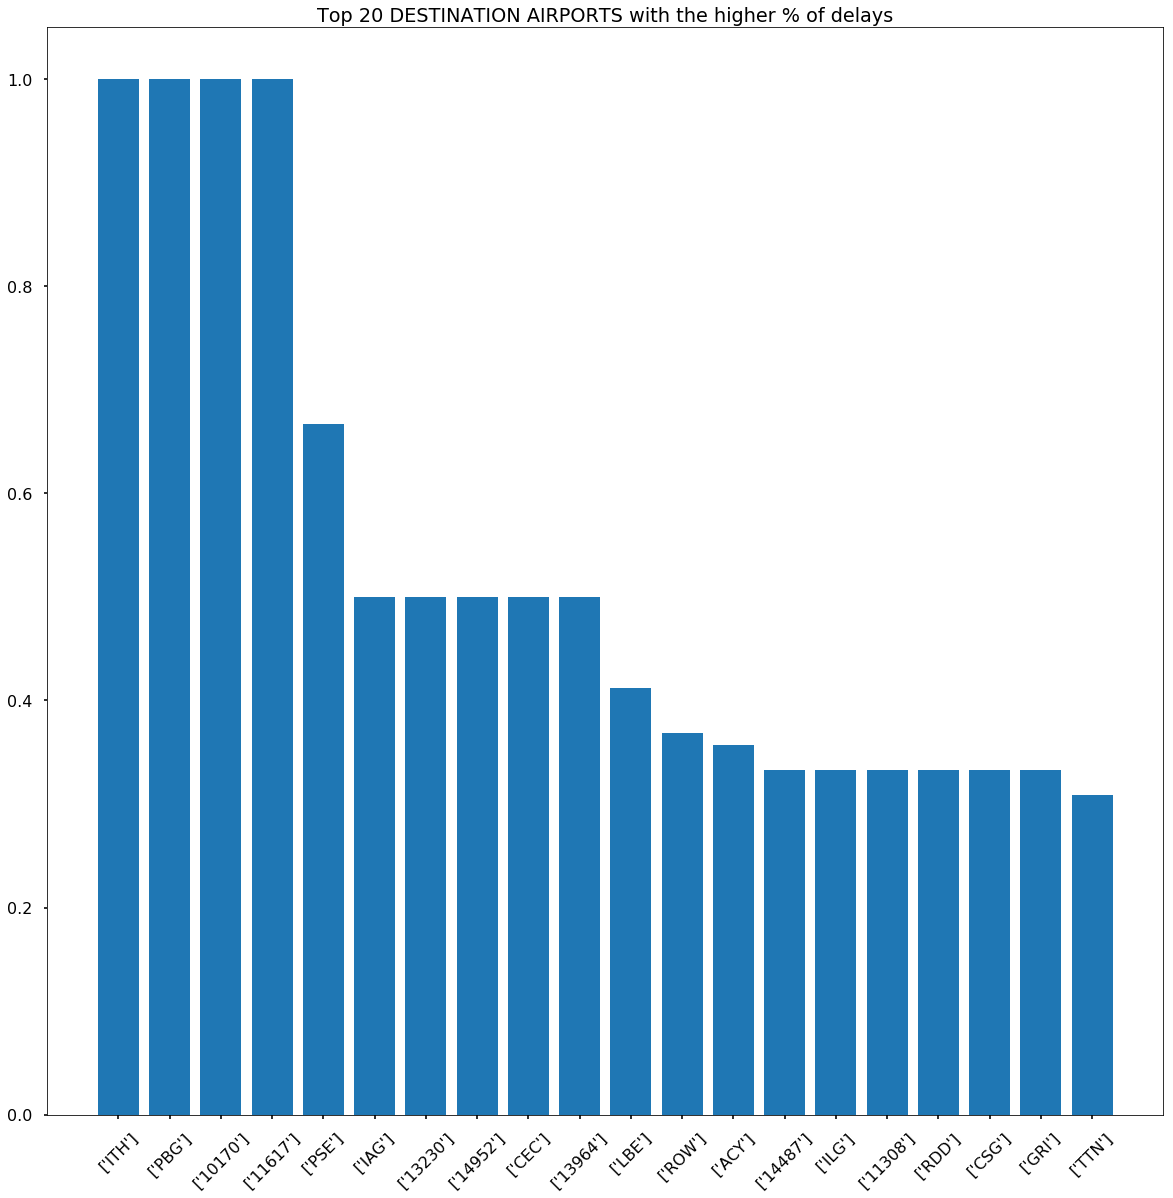

In [1274]:
# BAR CHART FOR TOP20 DESTINATION AIRPORTS WITH DELAYS
plt.figure(figsize=(20, 20))
airport = list(range(1,21))
labels=c.iloc[:,0:1].values
d=c.iloc[0:20, 3:4].values
plt.xticks(airport, labels, rotation=45)
plt.bar(airport,d )
plt.title ("Top 20 DESTINATION AIRPORTS with the higher % of delays")

In [1275]:
# WHICH DAY OF THE WEEK HAS THE MOST DELAYS
a = df_small.groupby(by=['DAY_OF_WEEK'])['DELAY_OR_NOT'].sum()
a= pd.DataFrame(a)
a.sort_values(['DELAY_OR_NOT'], ascending=False, inplace=True)
print("Thursday has the most number of delayed flights")
a

Thursday has the most number of delayed flights


,DELAY_OR_NOT
DAY_OF_WEEK,
4,2301
1,2141
5,1958
3,1782
2,1677
7,1471
6,967


In [1276]:
# WHICH MONTH HAS THE MOST DELAYS
a = df_small.groupby(by=['MONTH'])['DELAY_OR_NOT'].sum()
a= pd.DataFrame(a)
a.sort_values(['DELAY_OR_NOT'], ascending=False, inplace=True)
print("June has the most number of delayed flights")
a

June has the most number of delayed flights


,DELAY_OR_NOT
MONTH,
6,1763
7,1524
2,1281
1,1239
8,1090
12,1072
3,1061
5,965
4,801


In [1277]:
# WHICH AIRLINE HAS THE MOST DELAYS
a = df_small.groupby(by=['AIRLINE'])['DELAY_OR_NOT'].sum()
a = pd.DataFrame(a)
b=df_small["AIRLINE"].value_counts()
b = pd.DataFrame(b)
c = pd.concat ([a, b], axis=1).reset_index()
c['Average_delays']=c['DELAY_OR_NOT']/c['AIRLINE']
c.sort_values(['Average_delays'], ascending=False, inplace=True)
#print("WN has the most number of delayed flights")
a.sort_values(['DELAY_OR_NOT'], ascending=False, inplace=True)
print("WN has the largest number of delays, but NK has the largest proportion of delayed flight at 38%")
print(a), print (c)

WN has the largest number of delays, but NK has the largest proportion of delayed flight at 38%
         DELAY_OR_NOT
AIRLINE              
WN               2861
UA               1423
AA               1313
EV               1306
OO               1078
DL                913
B6                814
MQ                739
NK                697
F9                400
US                381
VX                156
AS                148
HA                 68
   index  DELAY_OR_NOT  AIRLINE  Average_delays
8     NK           697     1879        0.370942
5     F9           400     1681        0.237954
2     B6           814     5210        0.156238
10    UA          1423    10235        0.139033
7     MQ           739     5452        0.135547
12    VX           156     1241        0.125705
4     EV          1306    11427        0.114291
13    WN          2861    26321        0.108696
11    US           381     3941        0.096676
9     OO          1078    12208        0.088303
0     AA          1313  

(None, None)

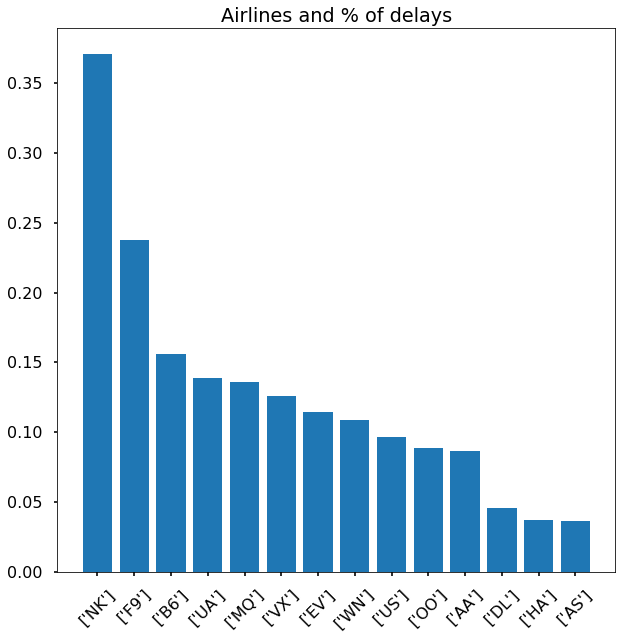

In [1278]:
# BAR CHART AIRLINES WITH MOST DELAYS
plt.figure(figsize=(10, 10))
airport = (range(len(c)))
labels=c.iloc[:,0:1].values
d=c.iloc[:, 3:4].values
plt.xticks(airport, labels, rotation=45)
plt.bar(airport,d )
plt.title ("Airlines and % of delays")

# Summary of EDA
- NK is the airline with the highest proportion of delayed flight
- WN is the airline with the highest number of delayed flights.
- Thursday is the day with the highest number of delayed flights.
- June has the highest number of delayed flights.
- Neither ORL or BOS are in the top 20 percetnage of flights delayed either as origin or destination airports.

# QUESTION 4

In [1279]:
x_train_small.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME
740307,2,7,US,CLT,ATL,9.500000,10.783333,-8.0,226,77.0,63.0
791567,1,1,B6,FLL,LAX,11.616667,14.483333,3.0,2342,352.0,333.0
749228,1,5,AA,DCA,MIA,18.083333,20.816667,-1.0,919,164.0,160.0
796915,7,1,AS,SEA,JNU,7.666667,9.116667,9.0,909,147.0,149.0
588745,7,1,DL,ATL,TPA,10.583333,12.000000,-3.0,406,85.0,74.0


In [1280]:
# CONVERTING TO DUMMIES
x_train_dummy = pd.get_dummies(x_train_small, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"], drop_first=True)
x_test_dummy = pd.get_dummies(x_test_small, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"], drop_first=True)
x_test_rest_dummy = pd.get_dummies(df_x_rest, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"], drop_first=True)

In [1281]:
x_train_dummy.shape, x_test_dummy.shape, x_test_rest_dummy.shape

((80980, 1214), (39887, 1118), (684074, 1286))

This is a very itneresting problem that x_train_dummy and x_test_dummy dont have the same number of predictors, which means it will not be possible to predict on x_test_dummy with a model trained on x_train_dummy since the number of coefficients will not be the same. I suspect it is the Origin and Destination airports that are not exactly the same in the two data sets. so lets try creating dummies without those.

In [1282]:
x_train_dummy = pd.get_dummies(x_train_small, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE"], drop_first=True)
x_test_dummy = pd.get_dummies(x_test_small, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE"], drop_first=True)
x_test_rest_dummy = pd.get_dummies(df_x_rest, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE"], drop_first=True)

In [1283]:
x_train_dummy.shape, x_test_dummy.shape, x_test_rest_dummy.shape

((80980, 38), (39887, 38), (684074, 38))

Now the number of predictors are equal in x_test_dummy and x_train_dummy thus can train the model on the test set. It is unfortunate that we had to drop the airports as predictors because there were some airports where more than 35% are delayed, but because of the data-set we are having to drop the predictors. If I had more skill I would choose the observations where both the origin and destination airports are present.


In [1284]:
x_train_dummy =x_train_dummy.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1)
x_test_dummy =x_test_dummy.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1)
x_test_rest_dummy =x_test_rest_dummy.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1)

x_train_dummy.shape, x_test_dummy.shape, x_test_rest_dummy.shape

((80980, 36), (39887, 36), (684074, 36))

In [1285]:
x_train_dummy.head()

,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
740307,9.500000,10.783333,-8.0,226,77.0,63.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
791567,11.616667,14.483333,3.0,2342,352.0,333.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
749228,18.083333,20.816667,-1.0,919,164.0,160.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796915,7.666667,9.116667,9.0,909,147.0,149.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588745,10.583333,12.000000,-3.0,406,85.0,74.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1286]:
y_train_small=y_train_small.astype('int')
y_test_small=y_test_small.astype('int')
df_y_rest=df_y_rest.astype('int')
x_test_rest_dummy.dtypes

SCHED_DEP          float64
SCHED_ARR          float64
DEPARTURE_DELAY    float64
DISTANCE             int64
SCHEDULED_TIME     float64
ELAPSED_TIME       float64
MONTH_2              uint8
MONTH_3              uint8
MONTH_4              uint8
MONTH_5              uint8
MONTH_6              uint8
MONTH_7              uint8
MONTH_8              uint8
MONTH_9              uint8
MONTH_10             uint8
MONTH_11             uint8
MONTH_12             uint8
DAY_OF_WEEK_2        uint8
DAY_OF_WEEK_3        uint8
DAY_OF_WEEK_4        uint8
DAY_OF_WEEK_5        uint8
DAY_OF_WEEK_6        uint8
DAY_OF_WEEK_7        uint8
AIRLINE_AS           uint8
AIRLINE_B6           uint8
AIRLINE_DL           uint8
AIRLINE_EV           uint8
AIRLINE_F9           uint8
AIRLINE_HA           uint8
AIRLINE_MQ           uint8
AIRLINE_NK           uint8
AIRLINE_OO           uint8
AIRLINE_UA           uint8
AIRLINE_US           uint8
AIRLINE_VX           uint8
AIRLINE_WN           uint8
dtype: object

In [1287]:
# LOGISTIC REGRESSION WITH REGULARIZATION AND CROSS VALIDATION
searchCV=LogisticRegressionCV(cv=5, penalty='l2')
searchCV.fit(x_train_dummy, y_train_small)
print("Accuracy of logistic model on small test set: %0.6f" % searchCV.score(x_test_dummy, y_test_small))
print("Accuracy of logistic model on large test sest: %0.6f" % searchCV.score(x_test_rest_dummy, df_y_rest))

Accuracy of logistic model on small test set: 0.999950
Accuracy of logistic model on large test sest: 0.999930


In [1288]:
from sklearn.metrics import confusion_matrix
y_pred=searchCV.predict(x_test_dummy)
cm = confusion_matrix(y_test_small, y_pred)
cm

array([[35814,     1],
       [    1,  4071]])

In [1289]:
#TRUE POSITIVE RATE
cm_tp=cm[1:2, 1:2]/np.sum(cm[1:2,:])

#TRUE NEGATIVE RATE
cm_tn=cm[0:1, 0:1]/np.sum(cm[0:1,:])

print("The True positive rate is %0.4f"% cm_tp)
print("The True negative rate is %0.4f"% cm_tn)

The True positive rate is 0.9998
The True negative rate is 1.0000


# Disucssion
Ths is not normal because such a high accuracy rate of 100% means that I have some predictor in my predictors set which is acting as a proxy for the dependent variable. I suspect it is the variable 'Departure Delay'. So I am going to repeat by dropping that predictor to see if anything changes.

In [1290]:
#DROPPING VARIABLE 'DEPARTURE DELAY
x_train_dummy =x_train_dummy.drop(['DEPARTURE_DELAY'], axis=1)
x_test_dummy =x_test_dummy.drop(['DEPARTURE_DELAY'], axis=1)
x_test_rest_dummy =x_test_rest_dummy.drop(['DEPARTURE_DELAY'], axis=1)

x_train_dummy.shape, x_test_dummy.shape, x_test_rest_dummy.shape

((80980, 35), (39887, 35), (684074, 35))

In [1292]:
# REPEATING LOGISTIC REGRESSION WITH REGULARIZATION AND CROSS VALIDATION
searchCV=LogisticRegressionCV(cv=5, penalty='l2')
searchCV.fit(x_train_dummy, y_train_small)
y_pred_log= searchCV.predict(x_test_dummy)
print("Accuracy of logistic model on small test set: %0.6f" % searchCV.score(x_test_dummy, y_test_small))
print("Accuracy of logistic model on large test sest: %0.6f" % searchCV.score(x_test_rest_dummy, df_y_rest))

Accuracy of logistic model on small test set: 0.918996
Accuracy of logistic model on large test sest: 0.918902


# AHA!
The 'Departure Delay' was hiding inside my model as a proxy for the dependent variable. The results now make more sense and it's also good to see that the results on teh smaller and larger testing sets are close enough showing there is no overfitting.

In [1293]:
y_pred=searchCV.predict(x_test_dummy)
cm = confusion_matrix(y_test_small, y_pred)
cm

array([[35495,   320],
       [ 2911,  1161]])

In [1294]:
#TRUE POSITIVE RATE
cm_tp=cm[1:2, 1:2]/np.sum(cm[1:2,:])

#TRUE NEGATIVE RATE
cm_tn=cm[0:1, 0:1]/np.sum(cm[0:1,:])

print("The True positive rate is %0.4f"% cm_tp)
print("The True negative rate is %0.4f"% cm_tn)

The True positive rate is 0.2851
The True negative rate is 0.9911


In [1295]:
# LDA MODEL
lda= discriminant_analysis.LinearDiscriminantAnalysis()
lda_fit=lda.fit(x_train_dummy, y_train_small)
print("Accuracy with LDA on small test: %0.4f" % lda_fit.score(x_test_dummy, y_test_small))
print("Accuracy with LDA on large test: %0.4f" % lda_fit.score(x_test_rest_dummy, df_y_rest))

#QDA MODEL
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_fit=qda.fit(x_train_dummy, y_train_small)
print("Accuracy with QDA with small test: %0.4f" % qda_fit.score(x_test_dummy, y_test_small))
print("Accuracy with QDA with large test: %0.4f" % qda_fit.score(x_test_rest_dummy, df_y_rest))


Accuracy with LDA on small test: 0.9186
Accuracy with LDA on large test: 0.9178
Accuracy with QDA with small test: 0.8535
Accuracy with QDA with large test: 0.8548


In [1296]:
# CONFUSION MATRIX FOR LDA
y_pred=lda.predict(x_test_dummy)
cm = confusion_matrix(y_test_small, y_pred)

#TRUE POSITIVE RATE
cm_tp=cm[1:2, 1:2]/np.sum(cm[1:2,:])

#TRUE NEGATIVE RATE
cm_tn=cm[0:1, 0:1]/np.sum(cm[0:1,:])

print("The True positive rate for lda is %0.2f"% cm_tp)
print("The True negative rate for lda is %0.2f"% cm_tn)

The True positive rate for lda is 0.31
The True negative rate for lda is 0.99


In [1103]:
# CONFUSION MATRIX FOR QDA
y_pred=qda.predict(x_test_dummy)
cm = confusion_matrix(y_test_small, y_pred)

#TRUE POSITIVE RATE
cm_tp=cm[1:2, 1:2]/np.sum(cm[1:2,:])

#TRUE NEGATIVE RATE
cm_tn=cm[0:1, 0:1]/np.sum(cm[0:1,:])

print("The True positive rate is %0.2f"% cm_tp)
print("The True negative rate is %0.2f"% cm_tn)

The True positive rate is 0.54
The True negative rate is 0.89


In [1100]:
#3.2 FINDING THE OPTIMAL TREE DEPTH
from sklearn.model_selection import GridSearchCV
est = DecisionTreeClassifier()
parameters = {"max_depth": range(1,30)}
gs = GridSearchCV(est, param_grid=parameters, cv=5)
gs.fit(x_train_dummy.values, y_train_small.DELAY_OR_NOT.values)
gs.best_params_, gs.best_score_

({'max_depth': 7}, 0.90321665556624486)

In [1104]:
# CONFUSION MATRIX FOR QDA
y_pred=gs.predict(x_test_dummy)
cm = confusion_matrix(y_test_small, y_pred)

#TRUE POSITIVE RATE
cm_tp=cm[1:2, 1:2]/np.sum(cm[1:2,:])

#TRUE NEGATIVE RATE
cm_tn=cm[0:1, 0:1]/np.sum(cm[0:1,:])

print("The True positive rate is %0.2f"% cm_tp)
print("The True negative rate is %0.2f"% cm_tn)

The True positive rate is 0.08
The True negative rate is 0.99


In [1105]:
#2.1 ROC CURVE FOR LOGISTIC MODEL AND ALL ZEROS CLASSIFIER

from sklearn.metrics import roc_curve, auc

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.3f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.3f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 5))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

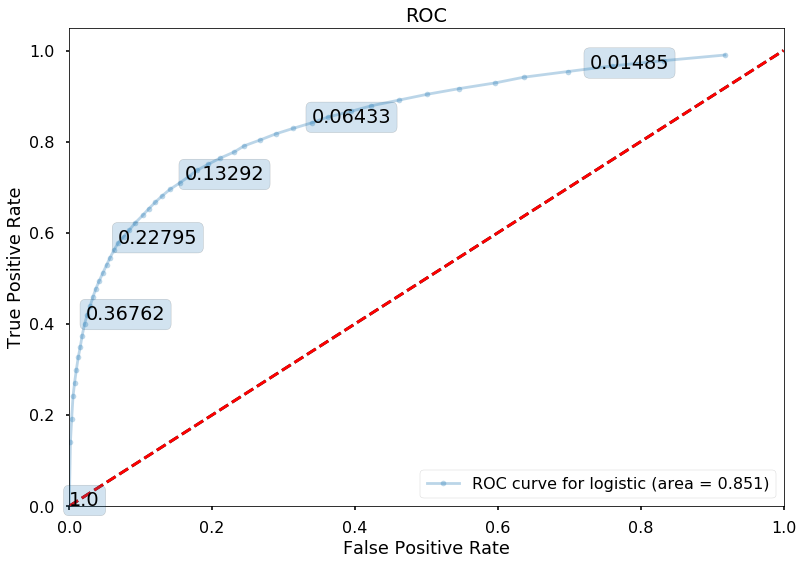

In [1106]:
sns.set_context("poster")
ax1=make_roc("logistic",searchCV, y_test_small, x_test_dummy, labe=950, skip=100)
ax1.plot([0, 1], [0, 1], ls="--", c="r")

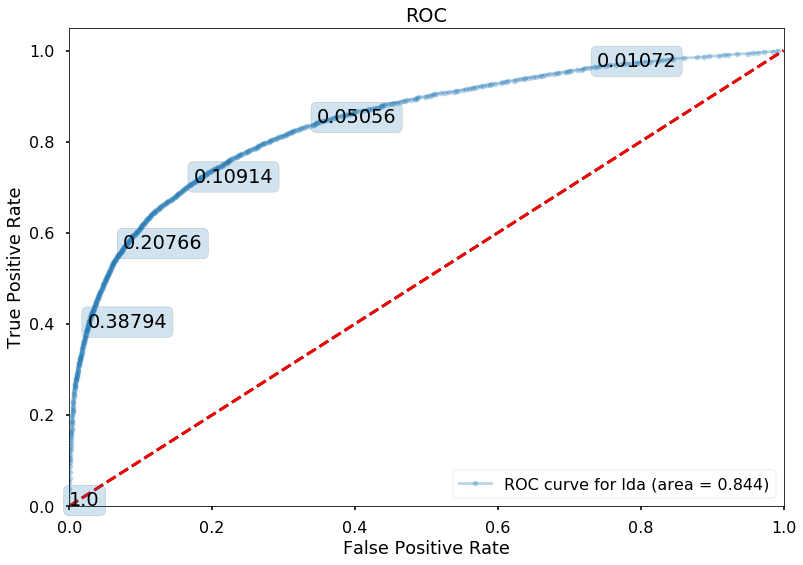

In [1107]:
sns.set_context("poster")
ax1=make_roc("lda",lda, y_test_small, x_test_dummy, labe=1000, skip=10)
ax1.plot([0, 1], [0, 1], ls="--", c="r")

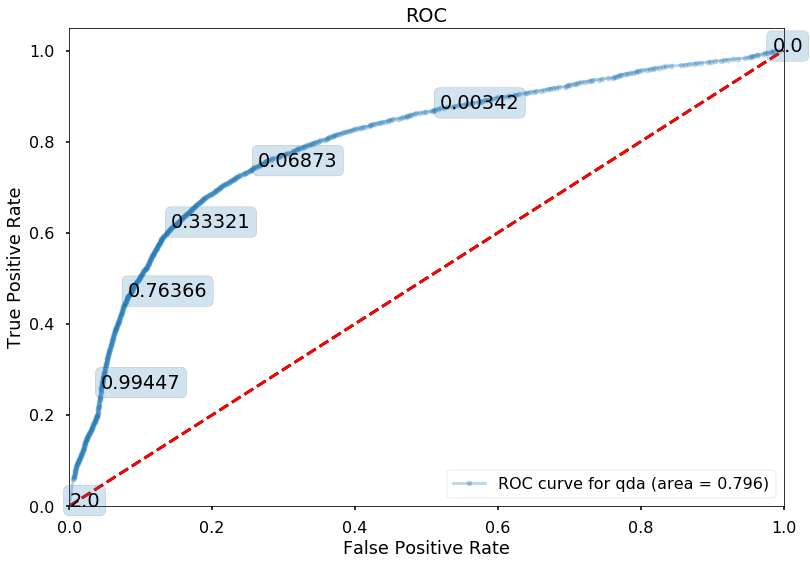

In [1108]:
sns.set_context("poster")
ax1=make_roc("qda",qda, y_test_small, x_test_dummy, labe=1000, skip=10)
ax1.plot([0, 1], [0, 1], ls="--", c="r")

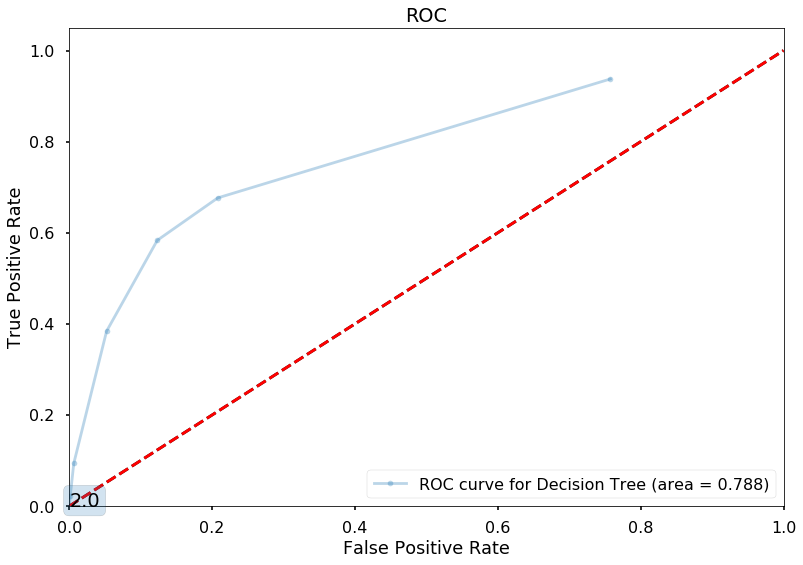

In [1109]:
sns.set_context("poster")
ax1=make_roc("Decision Tree",gs, y_test_small, x_test_dummy, labe=1000, skip=10)
ax1.plot([0, 1], [0, 1], ls="--", c="r")

# Discussion 4
The base accuracy, given the imbalance: 90% of the data is delay = 0. Thus compared to an all-zero's response, any model should do 90% or better. I whittled down the predictors to 11 and at each stage I have discussed why I have chosen to drop them. I tried four models and test them on both the small test set and then the large test set. In all cases the numbers were very close showing that the training sample was large enough and there is no overfitting.

|               | Accuracy | AUC   | TPR  | TNR   | Comments                                               |
|---------------|----------|-------|------|-------|--------------------------------------------------------|
| Base          | 0.90     | 0.6   |      |       |                                                        |
| Logistic      | 0.918    | 0.851 | 0.28 | 0.998 | Similar to LDA but lower TPR                           |
| LDA           | 0.917    | 0.844 | 0.31 | 0.99  | As good as Logistic, similar accuracy and better TPR   |
| QDA           | 0.85     | 0.796 | 0.54 | 0.89  | Accuracy Performance lower than base case of 90%       |
| Decision tree | 0.903    | 0.788 | 0.08 | 0.99  | Max depth is 7, accuracy performance same as base case |

# Question 5
I will be uisng the logistic model as my best model (to be honest it's performance is same as LDA but it is easier to implement than a LDA in practical terms). SKLearn does not display logit regression information as nicely as statsmodel. It can output the predictor values but there is no way to trace what the names of those predictors are and hence make practical conclusions. For this reason I replicated the logistic with stats model with dispalys results in a nicer way

In [1110]:
# LOGISTIC SKLEARN COEFFICIENTS
searchCV.coef_

array([[ 0.24101035, -0.00237354, -0.00206693, -0.05571052,  0.07462819,
         0.35139821, -0.02237669, -0.40480327, -0.10573555,  0.70833841,
         0.38370831, -0.03923274, -1.17940445, -1.25196354, -0.92918925,
         0.02558556, -0.49904317, -0.33691485,  0.0723411 , -0.2702105 ,
        -0.93027534, -0.68686599, -1.40583755,  0.53487307, -0.88401938,
         0.22265075,  0.87402443, -0.84523913,  0.51128299,  1.87377286,
        -0.23742264,  0.65779125, -0.54250955,  0.20343358,  0.39666613]])

In [1252]:
# exponent of the log odd to get the direct correlation with the possibility of a delay
np.exp(searchCV.coef_)

array([[ 1.27253421,  0.99762927,  0.99793521,  0.94581289,  1.07748346,
         1.4210531 ,  0.97787181,  0.66710804,  0.89966253,  2.0306144 ,
         1.46771726,  0.9615269 ,  0.30746179,  0.28594278,  0.39487372,
         1.02591568,  0.60711128,  0.71396963,  1.07502197,  0.76321882,
         0.39444509,  0.50315048,  0.24516164,  1.70723153,  0.41311909,
         1.24938415,  2.39653616,  0.42945465,  1.66742912,  6.51282208,
         0.7886579 ,  1.93052358,  0.58128765,  1.22560375,  1.48685943]])

In [1116]:
x_test_dummy.shape, y_test_small.shape, x_train_dummy.shape

((39935, 35), (39935, 1), (81078, 35))

In [1297]:
# LOGISTIC IN STATS MODEL
import statsmodels.api as sm
from sklearn.metrics import r2_score
log = sm.Logit(y_train_small, x_train_dummy)
log.fit().summary()

Optimization terminated successfully.
         Current function value: 0.256206
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           DELAY_OR_NOT   No. Observations:                80980
Model:                          Logit   Df Residuals:                    80945
Method:                           MLE   Df Model:                           34
Date:                Mon, 06 Nov 2017   Pseudo R-squ.:                  0.2201
Time:                        06:51:25   Log-Likelihood:                -20748.
converged:                       True   LL-Null:                       -26603.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SCHED_DEP          0.1793      0.004     51.086      0.000       0.172       0.186
SCHED_ARR         -0.0365      0.003    -11.791      0.000      -0.043      -0.030
DISTANCE           0.0021      0.000     18.243      0.000       0.002       0.002
SCHEDULED_TIME    -0.0903      0.001    -60.300      0.000      -0.093      -0.087
ELAPSED_TIME       0.0712      0.001     58.361      0.000       0.069       0.074
MONTH_2           -0.8256      0.053    -15.519      0.000      -0.930      -0.721
MONTH_3           -1.2977      0.054    -23.987      0.000      -1.404      -1.192
MONTH_4           -1.7460      0.060    -29.231      0.000      -1.863      -1.629
MONTH_5           -1.4113      0.056    -25.091      0.000      -1.522      -1.301
MONTH_6           -0.5670      0.049    -11.623      0.000      -0.663      -0.471
MONTH_7           -0.8950      0.050    -17.918      0.000      -0.993      -0.797
MONTH_8           -1.3465      0.054    -25.024      0.000      -1.452      -1.241
MONTH_9           -2.5086      0.070    -35.878      0.000      -2.646      -2.372
MONTH_10          -2.6757      0.072    -37.401      0.000      -2.816      -2.535
MONTH_11          -2.1491      0.064    -33.687      0.000      -2.274      -2.024
MONTH_12          -1.2282      0.055    -22.175      0.000      -1.337      -1.120
DAY_OF_WEEK_2     -1.0866      0.044    -24.513      0.000      -1.173      -1.000
DAY_OF_WEEK_3     -0.9291      0.044    -21.343      0.000      -1.014      -0.844
DAY_OF_WEEK_4     -0.6165      0.041    -14.901      0.000      -0.698      -0.535
DAY_OF_WEEK_5     -0.8470      0.043    -19.830      0.000      -0.931      -0.763
DAY_OF_WEEK_6     -1.4765      0.052    -28.551      0.000      -1.578      -1.375
DAY_OF_WEEK_7     -1.2365      0.046    -26.666      0.000      -1.327      -1.146
AIRLINE_AS        -2.4654      0.109    -22.635      0.000      -2.679      -2.252
AIRLINE_B6        -0.2760      0.061     -4.509      0.000      -0.396      -0.156
AIRLINE_DL        -1.7543      0.053    -32.852      0.000      -1.859      -1.650
AIRLINE_EV        -0.9516      0.050    -19.018      0.000      -1.050      -0.854
AIRLINE_F9        -0.0189      0.092     -0.206      0.837      -0.199       0.161
AIRLINE_HA        -2.8962      0.151    -19.218      0.000      -3.192      -2.601
AIRLINE_MQ        -0.6533      0.064    -10.197      0.000      -0.779      -0.528
AIRLINE_NK         0.8256      0.078     10.645      0.000       0.674       0.978
AIRLINE_OO        -1.3530      0.053    -25.759      0.000      -1.456      -1.250
AIRLINE_UA         0.0098      0.051      0.193      0.847      -0.089       0.109
AIRLINE_US        -1.4090      0.079    -17.819      0.000      -1.564      -1.254
AIRLINE_VX        -0.7976      0.127     -6.261      0.000      -1.047      -0.548
AIRLINE_WN        -0.8553      0.039    -21.971      0.000      -0.932      -0.779
==================================================================================
"""

# Discussion 5
It can be seen that certain months (esp towards the end of the year perhaps due to snow), day_of_week, certain airline are impactful on the delay of flights while scheduled arrival and departure delay, distance, scheduled and elapsed time are less impactful. Thus to predict if a flight will be late one should look at month, day_of_week and airline.

# Question 6

I already evaluated my model on the small and large test in part 4 after each model. Can scroll back up and see. The accuraries are below. They were very close to teh numbers I got when testing with teh small test set showing no overfitting:
- Logistic: 0.918
- LDA: 0.917
- QDA: 0.86
- Decision Tree: 0.903

# Question 7

In [1222]:
#Loading dataset
df = pd.read_csv('cs109a_midterm.csv')

# Creating a new variable according to ARRIVAL_DELAY
df["DELAY_OR_NOT"]=""
df["DELAY_OR_NOT"][df['ARRIVAL_DELAY']>=15]=1
df["DELAY_OR_NOT"][df['ARRIVAL_DELAY']<15]=0

In [1235]:
# CREATING A SUBSAMPLE WITH DATA WHERE DELAY=1
df_delay=df.loc[df['DELAY_OR_NOT']==1]
df_delay=df_delay.drop(['DATE', 'DEPARTURE_DELAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'DAY','TAIL_NUMBER', 'FLIGHT_NUMBER', 'DELAY_OR_NOT'], axis=1)
df_delay.shape

(82107, 9)

In [1236]:
# CONVERTING CLOCK TIME TO SECONDS INTEGER (TOOK THREE HOURS) for x_train_dummy
z = df_delay['SCHED_DEP'].str.split(pat = ':', expand=True)
x = z.values
x = z.astype(float)
x = pd.DataFrame(x)
x.iloc[:,2:3]=x.iloc[:,2:3]*(1/3600)
x.iloc[:,1:2]=x.iloc[:,1:2]*(1/60)
x['sum']=x.sum(axis=1)
df_delay['SCHED_DEP']=x['sum']

z = df_delay['SCHED_ARR'].str.split(pat = ':', expand=True)
x = z.values
x = z.astype(float)
x = pd.DataFrame(x)
x.iloc[:,2:3]=x.iloc[:,2:3]*(1/3600)
x.iloc[:,1:2]=x.iloc[:,1:2]*(1/60)
x['sum']=x.sum(axis=1)
df_delay['SCHED_ARR']=x['sum']

df_delay.head()

,MONTH,DAY_OF_WEEK,AIRLINE,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME
19,1,7,WN,18.583333,20.833333,132.0,666,135.0,146.0
25,7,3,EV,17.550000,19.333333,98.0,482,107.0,93.0
28,3,1,OO,18.250000,21.033333,128.0,867,167.0,161.0
54,3,4,US,14.000000,15.050000,38.0,184,63.0,106.0
59,4,1,EV,16.683333,17.750000,148.0,190,64.0,72.0


In [1237]:
y_df=df_delay.iloc[:,5:6]
df_delay = df_delay.drop(['ARRIVAL_DELAY'], axis=1)
df_delay.shape, y_df.shape

((82107, 8), (82107, 1))

In [1238]:
y_df.head()

,ARRIVAL_DELAY
19,132.0
25,98.0
28,128.0
54,38.0
59,148.0


In [1239]:
#log (ln) tranformation of y
y_df= np.log(y_df.ARRIVAL_DELAY)
y_df=pd.DataFrame(y_df)
y_df.head()

,ARRIVAL_DELAY
19,4.882802
25,4.584967
28,4.852030
54,3.637586
59,4.997212


In [1240]:
# creating the smaller train/test set on which we will do the bulk of the modelling work
x_train_small, x_test_small, y_train_small, y_test_small= train_test_split(df_delay, y_df, test_size = 0.5)
print("shapes:", x_train_small.shape, y_train_small.shape, x_test_small.shape, y_test_small.shape)

shapes: (41053, 8) (41053, 1) (41054, 8) (41054, 1)


In [1241]:
x_train_dummy = pd.get_dummies(x_train_small, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE"], drop_first=True)
x_test_dummy = pd.get_dummies(x_test_small, columns=["MONTH", "DAY_OF_WEEK", "AIRLINE"], drop_first=True)
x_train_dummy.shape, x_test_dummy.shape

((41053, 35), (41054, 35))

In [1242]:
x_train_dummy.head()

,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
183567,20.00,21.116667,223,67.0,109.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
785070,15.85,18.150000,1723,258.0,246.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
588168,23.00,1.833333,1303,230.0,226.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235776,18.15,19.316667,305,70.0,62.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
215658,19.50,21.050000,431,93.0,118.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1256]:
#SIMPLE LINEAR REGRESSION
lin = LinearRegression().fit(x_train_dummy, y_train_small)
y_pred = lin.predict(x_test_dummy)
print("R2 value simple linear regression no regularization:", r2_score(y_test_small,y_pred))

R2 value simple linear regression no regularization: 0.0380176610202


In [1257]:
lin.coef_

array([[ 0.01610536,  0.00275737, -0.00042943,  0.0025154 ,  0.00078975,
         0.00810968, -0.03051039, -0.05870051,  0.02293808,  0.11681981,
         0.04465093,  0.02756396, -0.13774675, -0.15819743, -0.09069273,
         0.02215648, -0.04913313, -0.08651228, -0.07170295, -0.08351138,
        -0.10680034, -0.0553249 , -0.16064487,  0.09474617, -0.07443305,
         0.06781715,  0.16113295, -0.27713441,  0.07770296,  0.18662437,
         0.00245487,  0.07802872, -0.13997466,  0.02882343, -0.02532284]])

In [1250]:
# TRYING A RIDGE
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(alphas=(0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100), cv=5)
ridgeCV.fit(x_train_dummy, y_train_small)
print("R2 value with RIDGE:", ridgeCV.score(x_test_dummy, y_test_small))

# TRYING A LASSO
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1.0, 10), cv=5)
lassoCV.fit(x_train_dummy, y_train_small)
print("R2 value with LASSO:", lassoCV.score(x_test_dummy, y_test_small))

R2 value with RIDGE: 0.0380078186563
R2 value with LASSO: 0.0379587208425


# Question 8

In [1254]:
# Reprinting the exponent of the log odds from the logistic model
np.exp(searchCV.coef_)

array([[ 1.27253421,  0.99762927,  0.99793521,  0.94581289,  1.07748346,
         1.4210531 ,  0.97787181,  0.66710804,  0.89966253,  2.0306144 ,
         1.46771726,  0.9615269 ,  0.30746179,  0.28594278,  0.39487372,
         1.02591568,  0.60711128,  0.71396963,  1.07502197,  0.76321882,
         0.39444509,  0.50315048,  0.24516164,  1.70723153,  0.41311909,
         1.24938415,  2.39653616,  0.42945465,  1.66742912,  6.51282208,
         0.7886579 ,  1.93052358,  0.58128765,  1.22560375,  1.48685943]])

In [1258]:
# COEFFICIENTS OF THE LINEAR REGRESSION MODEL
lin.coef_

array([[ 0.01610536,  0.00275737, -0.00042943,  0.0025154 ,  0.00078975,
         0.00810968, -0.03051039, -0.05870051,  0.02293808,  0.11681981,
         0.04465093,  0.02756396, -0.13774675, -0.15819743, -0.09069273,
         0.02215648, -0.04913313, -0.08651228, -0.07170295, -0.08351138,
        -0.10680034, -0.0553249 , -0.16064487,  0.09474617, -0.07443305,
         0.06781715,  0.16113295, -0.27713441,  0.07770296,  0.18662437,
         0.00245487,  0.07802872, -0.13997466,  0.02882343, -0.02532284]])

MAIN DESIGN DECISIONS AND METHODOLOGY
---------------------------------
- The main design decisions was managing the data and choosing predictors. First, I dropped predictors which had too many NaNs making it impossible to impute. Dropped the Departure Delay Variable predictor because it was a proxy for Arrival Delay. Needed to drop variables which are not present in both train and test set (E.g. the two airport predictors). Finally, keeping predictors to a managable number and one that lets either customers or the airline industry take actionable decision was a key decision factor. The final number of predictors I worked with is 36. 

- For the classification model I tried four different ones to see which one would give me a accuracy result better than 90% and AUC better than 0.6 (the base case). I chose the regularized logistic. 

- For the linear regression to predict the delay in time - I also chose similar number of predictors but this time 'ARRIVAL DELAY' was my dependent variable, a continuous variable. R2 is quite low showing that the combination of these predictors don't do a great job in explaining the minutes of delay, and there are probably many other factors contributing.

- What I could have done to improve my predictor selection is check the correlation of the residuals with each of my predictors and dependent variable to see if there is any omitted variable bias.

WHETHER A FLIGHT WILL BE DELAYED OR NOT
------------------------------------------
The top three predictors of whether a flight will be delayed or not are
- (1) Airline NK. Airline NK is 6.5 times more likely to be late. During the EDA we also saw about 38% of NK's flights are delayed.
- (2) Being on Airline HA increases likelihood of being late by 2.4 times.
- (3) Being on Airline UA increases likelihood of being late by 1.9 times.
Other non-flight but important predictors are:
- scheduled departure time: With every increase in hour (i.e. an hour later in the day) a flight is likely to the late 1.27 times. Thus flights later in the day are much more likely (upto 1.7 * 24 times) to be delayed.
- Month: Flights in June 2x more likely to be late than in January and this is supports our initial finding in the EDA that June had the highest number of delayed flights. After June, July and February are bad times to fly while Sept, Oct and Nov have the least delays.
Summary: A customer should not fly on airlines NK and HA, try to fly as early in the day as possible and avoid flying in June if he/she cares about avoiding delays. From the airline industry perspective, they industry needs to understand why flights tend to get delayed later in the day, perhaps how airports can be better managed to avoid this. Both airport and airline personnel should prepare in advance for increased delays in June and plan to mitigate it.

HOW MUCH A FLIGHT WILL BE DELAYED ONCE IT IS DELAYED
---------------------------------------------------------
This was a log-linear regression model which means that a 1 unit increase in X1 is associated with a 100B1% change in Y. Top three factors which increase the time of delay:
- (1) Being on airline NK increase the delay time by 18% 
- (2) Being on HA increases the delay time by 16% 
- (3) Being on airline B6 increase delay time by 9.5%. 
- Non-airline reason that contributes to delay are: flying in the month of June increases airline delay by 11%.




### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 